In [1]:
from __future__ import print_function
from __future__ import division
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.types import StructType, StructField
from pyspark.sql.types import DoubleType, IntegerType, StringType
from ggplot import *
import pandas as pd
from matplotlib import pyplot
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
import numpy as np

schema = StructType([
    StructField("user_id", StringType()),
    StructField("business_id", StringType()),
    StructField("date", StringType()),
    StructField("stars", IntegerType()),
    StructField("review_length", IntegerType()),
    StructField("pos_words", IntegerType()),
    StructField("neg_words", IntegerType()),
    StructField("net_sentiment", IntegerType())
])

spark = SparkSession.builder.master("spark://Yashs-MacBook-Pro-2.local:7077").appName("Yelp Analysis").config("spark.some.config.option", "some-value").getOrCreate()
df = spark.read.csv("file:///Users/yashparikh/Project/yelp_reviews.csv", header=True, schema=schema)
df.createOrReplaceTempView("reviews")

posPropDF = spark.sql("SELECT round((pos_words)/(review_length) * 100, 2) as posProportion, round((neg_words)/(review_length) * 100, 2) as negProportion, stars FROM reviews ORDER BY stars ASC")
posPropVal = posPropDF.select("posProportion").rdd.flatMap(lambda x: x).collect()
negPropVal = posPropDF.select("negProportion").rdd.flatMap(lambda x: x).collect()
starsVal = posPropDF.select('stars').rdd.flatMap(lambda x: x).collect()

plotDF = pd.DataFrame()
plotDF["proportion"] = posPropVal
plotDF["stars"] = starsVal
plotDF.groupby('stars').hist(stacked = True)



/Users/yashparikh/anaconda2/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/yashparikh/anaconda2/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/yashparikh/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


stars
1    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
2    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
3    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
4    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
5    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
dtype: object

stars
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
3    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
4    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
5    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

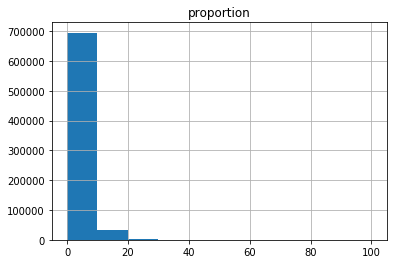

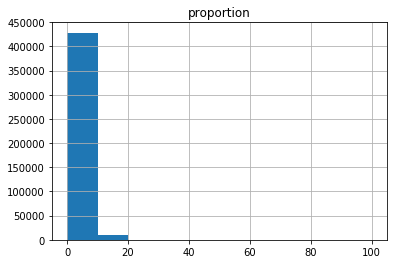

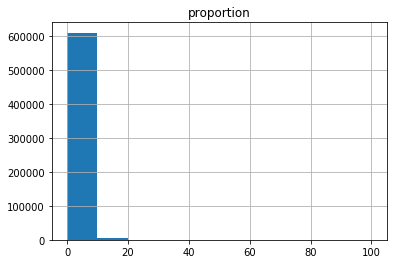

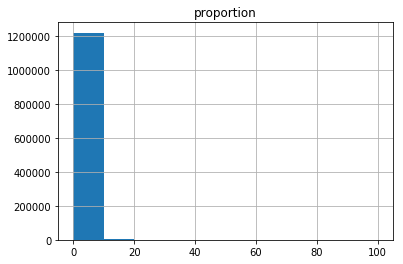

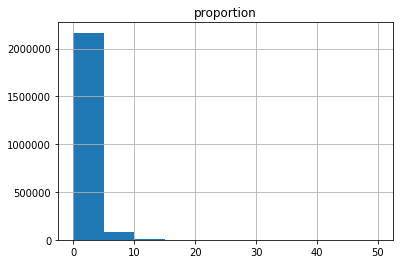

In [2]:
plotDF["proportion"] = negPropVal
plotDF.groupby('stars').hist(stacked = True)

stars
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
3    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
4    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
5    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

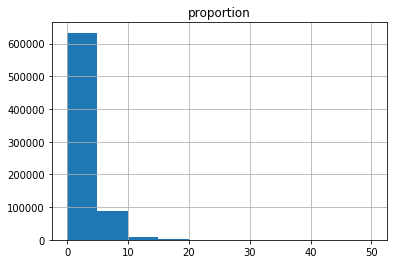

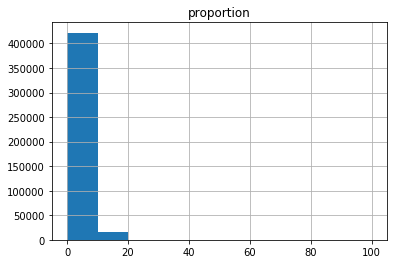

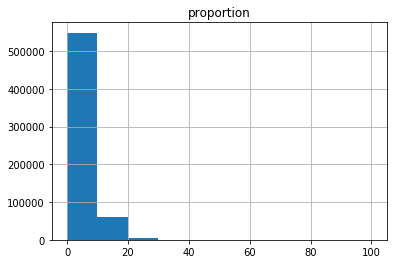

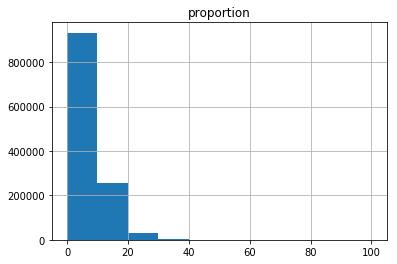

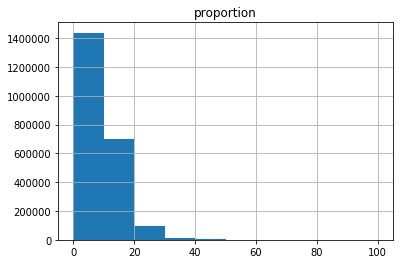

In [3]:
plotDF["proportion"] = posPropVal
plotDF.groupby('stars').hist(stacked = True)